<a href="https://colab.research.google.com/github/mdshahilak/ML_TFLite/blob/main/fruit_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install tensorflow

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
!unzip /content/gdrive/MyDrive/Fruit_project/fruits_and_vege.zip

Streaming output truncated to the last 5000 lines.
  inflating: fruits_and_vege/Validate/Apple 9/145_100.jpg  
  inflating: fruits_and_vege/Validate/Apple 9/146_100.jpg  
  inflating: fruits_and_vege/Validate/Apple 9/157_100.jpg  
  inflating: fruits_and_vege/Validate/Apple 9/158_100.jpg  
  inflating: fruits_and_vege/Validate/Apple 9/191_100.jpg  
  inflating: fruits_and_vege/Validate/Apple 9/192_100.jpg  
  inflating: fruits_and_vege/Validate/Apple 9/203_100.jpg  
  inflating: fruits_and_vege/Validate/Apple 9/204_100.jpg  
  inflating: fruits_and_vege/Validate/Apple 9/215_100.jpg  
  inflating: fruits_and_vege/Validate/Apple 9/216_100.jpg  
  inflating: fruits_and_vege/Validate/Apple 9/236_100.jpg  
  inflating: fruits_and_vege/Validate/Apple 9/237_100.jpg  
  inflating: fruits_and_vege/Validate/Apple 9/251_100.jpg  
  inflating: fruits_and_vege/Validate/Apple 9/252_100.jpg  
  inflating: fruits_and_vege/Validate/Apple 9/263_100.jpg  
  inflating: fruits_and_vege/Validate/Apple 9/264

In [5]:
# Import necessary libraries
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

In [6]:
# Check for GPU availability
device_name = tf.test.gpu_device_name()
print(f"Using device: {device_name if device_name else 'CPU'}")

Using device: /device:GPU:0


In [12]:
# Define dataset paths
data_dir = "/content/fruits_and_vege"  # Replace with your dataset folder
train_dir = f"{data_dir}/Training"
val_dir = f"{data_dir}/Validate"
test_dir = f"{data_dir}/Test"

In [13]:
# Data augmentation and preprocessing
img_size = (100, 100)  # MobileNetV3 requires 100x100 input
batch_size = 32

train_datagen = ImageDataGenerator(
    rescale=1.0 / 255.0,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode="nearest",
)
val_datagen = ImageDataGenerator(rescale=1.0 / 255.0)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode="categorical",
)
val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode="categorical",
)
test_generator = val_datagen.flow_from_directory(
    test_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode="categorical",
    shuffle=False,
)

num_classes = len(train_generator.class_indices)
print(f"Number of classes: {num_classes}")

Found 26330 images belonging to 65 classes.
Found 5828 images belonging to 65 classes.
Found 26330 images belonging to 65 classes.
Number of classes: 65


In [18]:
# Load MobileNetV3 Small
base_model = tf.keras.applications.MobileNetV3Small(
    input_shape=(100, 100, 3),
    include_top=False,
    weights="imagenet",
)
base_model.trainable = False  # Freeze the base model

In [19]:
# Add custom classification head
model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(128, activation="relu"),  # Add a hidden layer
    tf.keras.layers.Dense(num_classes, activation="softmax"),  # Output layer
])

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss="categorical_crossentropy",
    metrics=["accuracy"],
)


In [20]:
# Train the model
num_epochs = 10

history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=num_epochs,
    verbose=1,
)


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


823/823 ━━━━━━━━━━━━━━━━━━━━ 118s 127ms/step - accuracy: 0.0256 - loss: 4.1678 - val_accuracy: 0.0496 - val_loss: 4.1355
Epoch 2/10
823/823 ━━━━━━━━━━━━━━━━━━━━ 95s 114ms/step - accuracy: 0.0459 - loss: 4.1016 - val_accuracy: 0.0496 - val_loss: 4.0008
Epoch 3/10
823/823 ━━━━━━━━━━━━━━━━━━━━ 93s 113ms/step - accuracy: 0.0538 - loss: 3.9808 - val_accuracy: 0.0546 - val_loss: 3.8484
Epoch 4/10
823/823 ━━━━━━━━━━━━━━━━━━━━ 140s 111ms/step - accuracy: 0.0601 - loss: 3.8593 - val_accuracy: 0.0587 - val_loss: 3.7372
Epoch 5/10
823/823 ━━━━━━━━━━━━━━━━━━━━ 92s 111ms/step - accuracy: 0.0660 - loss: 3.7819 - val_accuracy: 0.0635 - val_loss: 3.6569
Epoch 6/10
823/823 ━━━━━━━━━━━━━━━━━━━━ 142s 112ms/step - accuracy: 0.0809 - loss: 3.6924 - val_accuracy: 0.1229 - val_loss: 3.5352
Epoch 7/10
823/823 ━━━━━━━━━━━━━━━━━━━━ 92s 111ms/step - accuracy: 0.0945 - loss: 3.6264 - val_accuracy: 0.1241 - val_loss: 3.4339
Epoch 8/10
823/823 ━━━━━━━━━━━━━━━━━━━━ 141s 110ms/step - accuracy: 0.1042 - loss: 3.5505 -

In [22]:
# Save the trained model
model.save("mobilenet_v3_fruits_and_vege.h5")
print("Training complete and model saved!")

Training complete and model saved!


In [23]:
# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(test_generator, verbose=1)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

823/823 ━━━━━━━━━━━━━━━━━━━━ 21s 26ms/step - accuracy: 0.1512 - loss: 3.3457
Test Accuracy: 16.07%


In [24]:
# Predictions on test data
predictions = model.predict(test_generator)
y_pred = np.argmax(predictions, axis=1)
y_true = test_generator.classes

823/823 ━━━━━━━━━━━━━━━━━━━━ 25s 26ms/step


In [25]:
# Generate classification report
class_names = list(test_generator.class_indices.keys())
report = classification_report(y_true, y_pred, target_names=class_names, digits=4)
print(report)

                 precision    recall  f1-score   support

          Apple     0.0000    0.0000    0.0000       485
        Apple 1     0.0000    0.0000    0.0000       248
        Apple 2     0.0000    0.0000    0.0000       392
        Apple 3     0.0000    0.0000    0.0000       381
        Apple 4     0.0000    0.0000    0.0000       392
        Apple 5     0.0000    0.0000    0.0000       380
        Apple 6     0.0000    0.0000    0.0000       392
        Apple 7     0.0000    0.0000    0.0000       392
        Apple 8     0.0000    0.0000    0.0000       329
        Apple 9     0.0000    0.0000    0.0000       390
        Avocado     0.0000    0.0000    0.0000       327
         Banana     0.2036    0.1718    0.1864       390
       Banana 1     0.9091    0.0256    0.0499       390
       Banana 2     0.0000    0.0000    0.0000       350
       Beetroot     0.0000    0.0000    0.0000       350
        Brinjal     0.7667    0.8750    0.8173       368
        Cabbage     0.0000    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


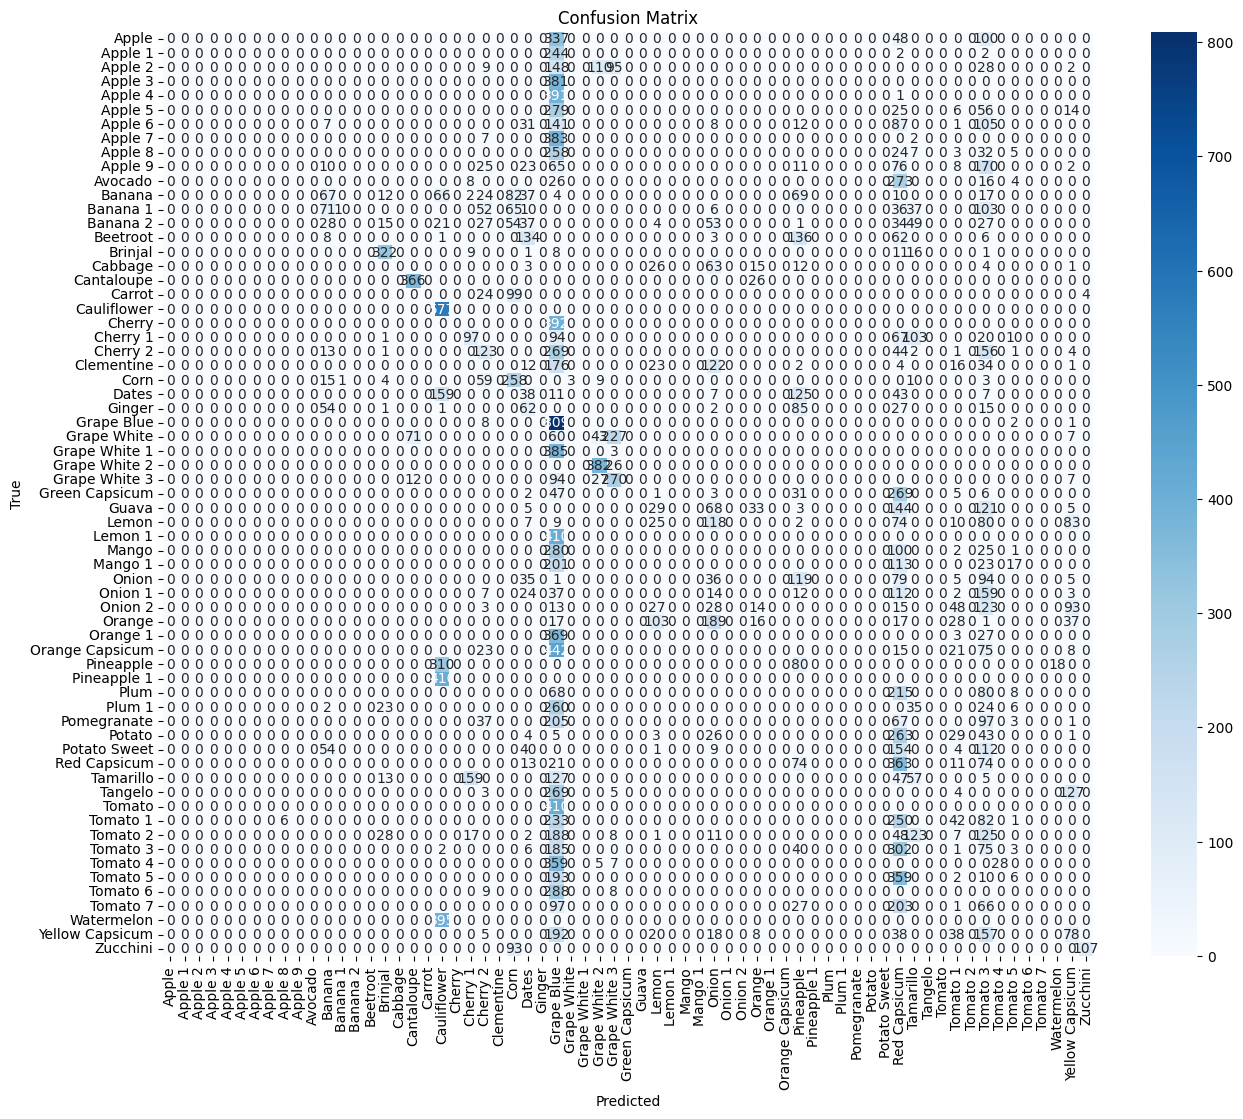

In [26]:
# Confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(15, 12))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

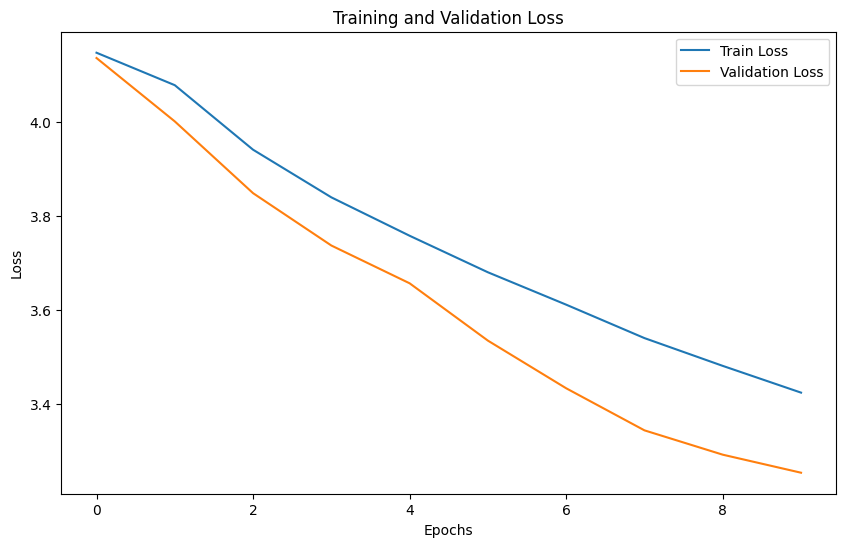

In [27]:
# Plot training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

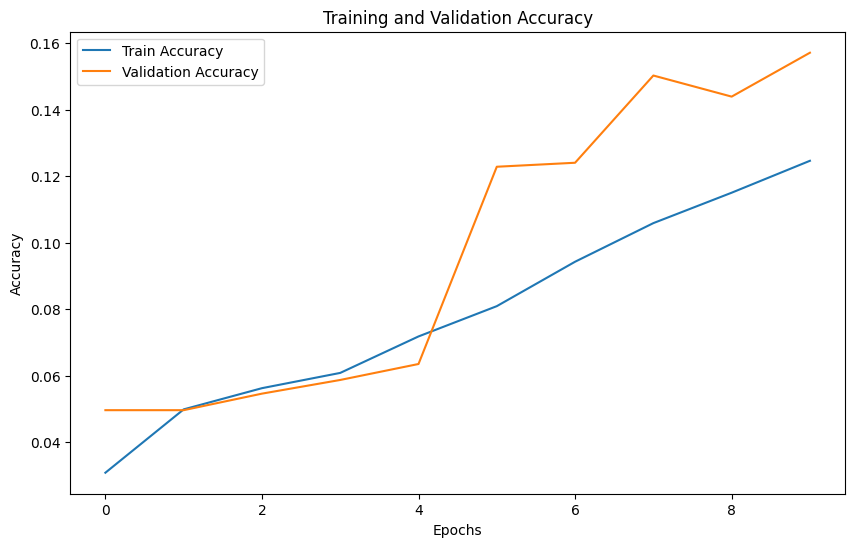

In [28]:
# Plot training and validation accuracy
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

In [29]:
# Convert to TensorFlow Lite
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

Saved artifact at '/tmp/tmpmk7fufhw'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 100, 100, 3), dtype=tf.float32, name='keras_tensor_530')
Output Type:
  TensorSpec(shape=(None, 65), dtype=tf.float32, name=None)
Captures:
  138770127144912: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138770129967888: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138770129965952: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138770129967184: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138770129968416: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138770129961200: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138770129966832: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138770129973344: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138770129975632: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138770128093776: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138770129

In [30]:
# Save the TFLite model
tflite_model_path = "mobilenet_v3_fruits.tflite"
with open(tflite_model_path, "wb") as f:
    f.write(tflite_model)

print(f"TFLite model saved at: {tflite_model_path}")

TFLite model saved at: mobilenet_v3_fruits.tflite


In [31]:
# Load the TFLite model and evaluate
interpreter = tf.lite.Interpreter(model_path=tflite_model_path)
interpreter.allocate_tensors()

In [32]:
# Get input and output details
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [35]:
# Evaluate on test dataset
y_pred_tflite = []

for i, (img_batch, _) in enumerate(test_generator):
    # Iterate over each image in the batch
    for img in img_batch:
        img = img.astype(np.float32)
        # Reshape to (1, 100, 100, 3) for single image input
        img = img.reshape(1, 100, 100, 3)
        interpreter.set_tensor(input_details[0]['index'], img)
        interpreter.invoke()
        predictions_tflite = interpreter.get_tensor(output_details[0]['index'])
        y_pred_tflite.extend(np.argmax(predictions_tflite, axis=1))
    if i == len(test_generator) - 1:
        break

In [36]:
# Compare TFLite results with original model
report_tflite = classification_report(y_true, y_pred_tflite, target_names=class_names, digits=4)
print("TFLite Model Evaluation")
print(report_tflite)

TFLite Model Evaluation
                 precision    recall  f1-score   support

          Apple     0.0000    0.0000    0.0000       485
        Apple 1     0.0000    0.0000    0.0000       248
        Apple 2     0.0000    0.0000    0.0000       392
        Apple 3     0.0000    0.0000    0.0000       381
        Apple 4     0.0000    0.0000    0.0000       392
        Apple 5     0.0000    0.0000    0.0000       380
        Apple 6     0.0000    0.0000    0.0000       392
        Apple 7     0.0000    0.0000    0.0000       392
        Apple 8     0.0000    0.0000    0.0000       329
        Apple 9     0.0000    0.0000    0.0000       390
        Avocado     0.0000    0.0000    0.0000       327
         Banana     0.2462    0.2077    0.2253       390
       Banana 1     0.9091    0.0256    0.0499       390
       Banana 2     0.0000    0.0000    0.0000       350
       Beetroot     0.0000    0.0000    0.0000       350
        Brinjal     0.6921    0.7880    0.7370       368
      

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
